<a href="https://colab.research.google.com/github/arthurjacom/Machine_Learning/blob/main/census_income/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar Bibliotécas
import pandas as pd
import numpy as np
import graphviz
import pydotplus

from IPython.display import Image 
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Obtenção de dados
adlt = pd.read_csv('adult.csv')

In [3]:
#Explorando a base
adlt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#Verificar valores nulos
adlt.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
#Pré-processamento
pre = preprocessing.LabelEncoder()

In [6]:
#age
adlt['workclass'] = pre.fit_transform(adlt['workclass'])
#flnwght
adlt['education'] = pre.fit_transform(adlt['education'])
#education.num
adlt['marital.status'] = pre.fit_transform(adlt['marital.status'])
adlt['occupation'] = pre.fit_transform(adlt['occupation'])
adlt['relationship'] = pre.fit_transform(adlt['relationship'])
adlt['race'] = pre.fit_transform(adlt['race'])
adlt['sex'] = pre.fit_transform(adlt['sex'])
#capital.gain
#capital.loss
#hours.per.week
adlt['native.country'] = pre.fit_transform(adlt['native.country'])
adlt['income'] = pre.fit_transform(adlt['income'])

In [38]:
adlt.drop(['fnlwgt'], axis=1, inplace=True)

In [39]:
#Modelagem
X_train, X_test, y_train, y_test = train_test_split(adlt.drop('income',axis=1), adlt['income'], test_size=0.30, random_state=100)

In [40]:
dectree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
dectree = dectree.fit(X_train, y_train)

In [41]:
#Predição
treepred = dectree.predict(X_test) 
treepred

array([0, 0, 0, ..., 1, 1, 0])

In [42]:
#Visualização da Árvore de Decisões
dot_data = tree.export_graphviz(dectree, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(X_train), class_names=['<50k', '>50k'],
                               filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
graph

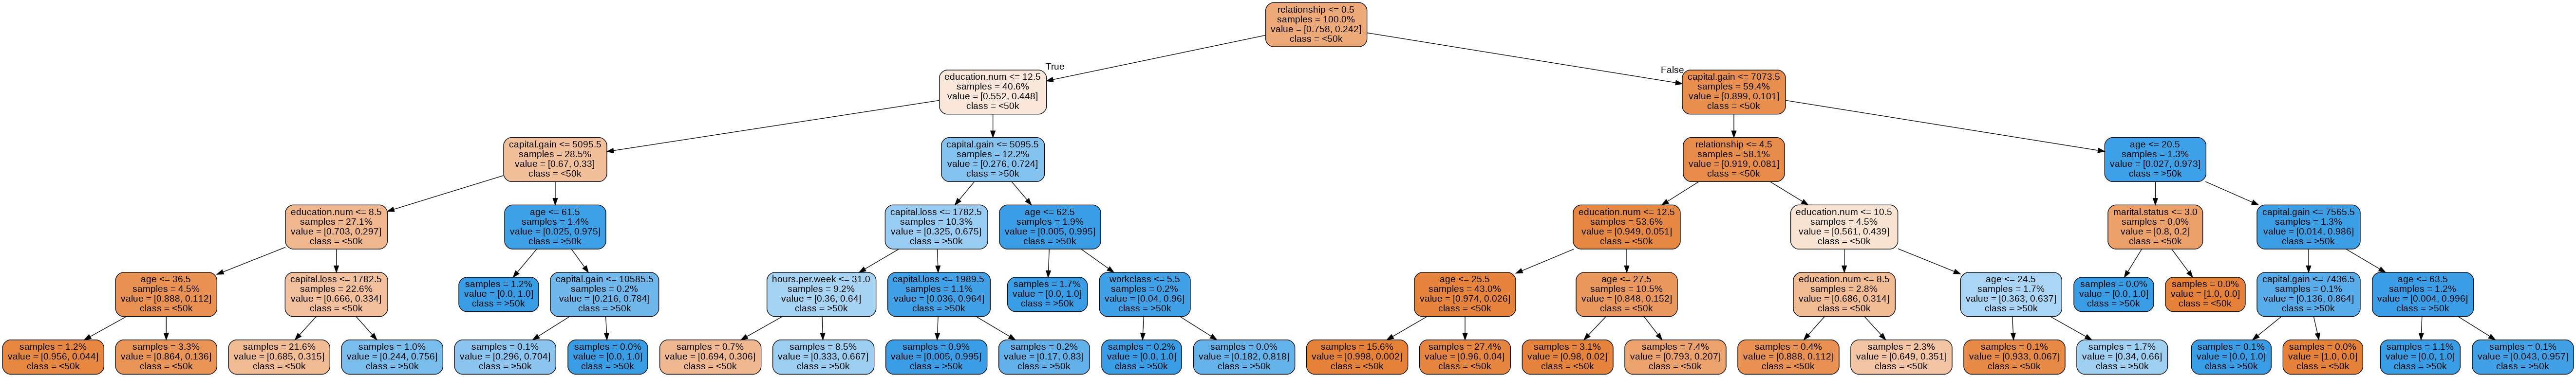

In [43]:
Image(graph.create_png())

In [44]:
#Avaliação
prectree = str(round(dectree.score(X_test,y_test) * 100, 2))+"%" #Medindo a preciso do modelo
print("A acurácia do modelo Árvore de Decisões foi", prectree)

A acurácia do modelo Árvore de Decisões foi 85.45%


In [30]:
#Matriz de Confusão
print("\nMatriz de confusão:\n",
pd.crosstab(y_test, treepred, rownames=['Real'], colnames=['Predito'],
margins=True, margins_name='Todos'))


Matriz de confusão:
 Predito     0     1  Todos
Real                      
0        7165   276   7441
1        1106  1222   2328
Todos    8271  1498   9769


In [31]:
#Relatório de Classificação
print(classification_report(y_test, treepred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7441
           1       0.82      0.52      0.64      2328

    accuracy                           0.86      9769
   macro avg       0.84      0.74      0.78      9769
weighted avg       0.85      0.86      0.85      9769

